# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

Este conjunto de datos describe los hongos en términos de sus características físicas. Se clasifican como venenosos o comestibles.

Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos de láminas en las familias Agaricus y Lepiota. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa. La guía establece claramente que no hay una regla simple para determinar la comestibilidad de un hongo. Con esa informacion:

Siendo la clase positiva la indicación que el hongo es venenoso ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de recall alto

<10%>
Respuesta:

### Obtención de datos
Importe las librerías a utilizar:

In [2]:
import pandas as pd

Importe los datos:

In [3]:
url = "https://gitlab.com/francisco.arduh/datasets/-/raw/main/mushroom.csv"
df = pd.read_csv(url)

display(df)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',b'b',b'v',b'l',b'e'
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'


In [4]:
# Viendo los datos nosotros tenemos que enfocarnos en la columna 'class' 
# donde hongo comestible = b'e' y hongo venenoso = b'p'

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [5]:
# Nos fijamos que no haya datos nulos

print(df.isnull().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64


In [6]:
# Corroboramos si hay columnas con muchos datos únicos
unique_counts = df.nunique()

print(unique_counts)

# Vemos que la columna "veil-type" podría eliminarse ya que solo tiene un valor único y no proporciona ninguna información útil para el modelo.

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises%3F                   2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
class                        2
dtype: int64


In [7]:
# Vemos informacion del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [8]:
# Ahora probamos con describe() para corroborar

df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Hago histograma para cada columna, ESTA COMENTADO SOLO PORQUE QUEDA MUY EXTENSO

# Crear un histograma para cada característica
#for feature in df.columns:
#    fig, ax = plt.subplots(figsize=(3, 3))
#    ax.hist(df[feature])
#    ax.set_title(feature)
#    plt.show()

In [10]:
# Vemos los valores de nuestra variable objetivo Class
df["class"].value_counts()

class
b'e'    4208
b'p'    3916
Name: count, dtype: int64

<Axes: title={'center': 'Comestible vs. Venenoso'}, xlabel='class'>

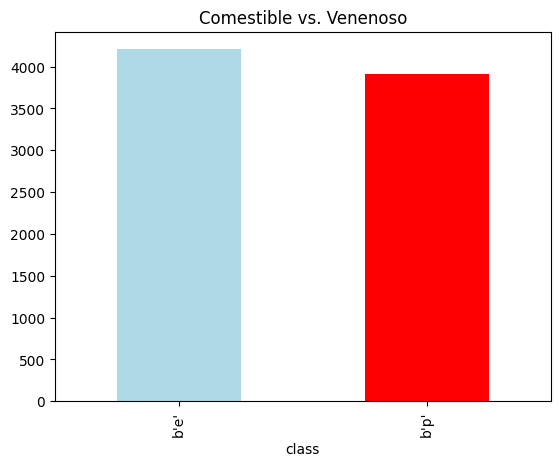

In [11]:
# Lo graficamos para verlo mejor
df["class"].value_counts().plot(kind="bar",color=["lightblue", "red"], title="Comestible vs. Venenoso")

In [35]:
# Definimos las variables de la columna "Class" como numericas

# Creamos un diccionario que mapea los valores a reemplazar con sus correspondientes valores nuevos
reemplazos = {"b'e'": 1, "b'p'": 0}

# Utilizamos la función replace() para reemplazar los valores en la columna
df['class'] = df['class'].replace(reemplazos)

# Ahora tenemos: hongo venenoso = 0, y hongo comestible = 1
display(df)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',0
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',1
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',1
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',0
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',1
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',b'b',b'v',b'l',1
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',1
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',0


In [13]:
# Definimos X e y

X = df.drop(['class', 'veil-type'], axis=1)
y = df['class']

In [14]:
# Utilizamos OneHotEncoder que lo que hace es transformar las variables categoricas en numericas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

one_hot_encoded_array = encoder.fit_transform(X[['cap-shape','cap-surface','cap-color','bruises%3F',
                        'odor','gill-attachment','gill-spacing','gill-size',
                        'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
                        'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
                        'veil-color','ring-number','ring-type','spore-print-color','population','habitat']])

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out(['cap-shape','cap-surface','cap-color','bruises%3F',
                        'odor','gill-attachment','gill-spacing','gill-size',
                        'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
                        'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
                        'veil-color','ring-number','ring-type','spore-print-color','population','habitat']))

X = pd.concat([X, one_hot_encoded_df], axis=1).drop(columns=['cap-shape','cap-surface','cap-color','bruises%3F',
                        'odor','gill-attachment','gill-spacing','gill-size',
                        'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
                        'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
                        'veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

display(X)




/home/fran/Documentos/5 AÑO/Sistemas Inteligentes carpeta/Sistemas-Inteligentes/Clase 4/my_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cap-shape_b'b',cap-shape_b'c',cap-shape_b'f',cap-shape_b'k',cap-shape_b's',cap-shape_b'x',cap-surface_b'f',cap-surface_b'g',cap-surface_b's',cap-surface_b'y',...,population_b's',population_b'v',population_b'y',habitat_b'd',habitat_b'g',habitat_b'l',habitat_b'm',habitat_b'p',habitat_b'u',habitat_b'w'
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<5%> Separar X_train, y_train, X_test, y_test

In [15]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test)


      cap-shape_b'b'  cap-shape_b'c'  cap-shape_b'f'  cap-shape_b'k'   
7873             0.0             0.0             0.0             1.0  \
6515             0.0             0.0             0.0             0.0   
6141             0.0             0.0             1.0             0.0   
2764             0.0             0.0             1.0             0.0   
438              1.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
5226             0.0             0.0             0.0             0.0   
5390             0.0             0.0             0.0             1.0   
860              0.0             0.0             1.0             0.0   
7603             0.0             0.0             0.0             1.0   
7270             0.0             0.0             0.0             1.0   

      cap-shape_b's'  cap-shape_b'x'  cap-surface_b'f'  cap-surface_b'g'   
7873             0.0             0.0               0.0     

### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

In [16]:
#Las transformaciones las hice mas arriba donde hice las siguientes modificaciones:

# * Variables categóricas con más de un valor único: lo que hice con estas columnas
#fue utilizar OneHotEncoder para transformar cada valor único en una nueva columna binaria.

# * Variables de identificación: La columna "veil-type" solo tenia un valor único y 
#no proporcionaba información útil para el modelado, por lo que la elimine.

# * Variable objetivo: En la columna 'class' lo que hice fue reemplazar los valores de sus 
# variables por 0 y 1 transformandola en binaria.

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [ ]:
# Ya hecho arriba !

### Selección de modelo y entrenamiento
 


In [18]:
# Primero lo probe con el modelo SGD solo para ver como estaba funcionando
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [19]:
# Prediccion

y_pred = sgd_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier(random_state=42)

In [45]:
#Entrenamos el modelo Random Forest

from sklearn.model_selection import cross_val_score

model_train = cla_rf.fit(X_train, y_train)
y_pred_rf = cla_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Valor en la region de prueba con Random Forest: ", accuracy_rf)

# Determino el valor en la region de entrenamiento 
pred_train = model_train.score(X_train,y_train)
print("Valor en la region de entrenamiento con Random Forest: ",pred_train)

#Validacion cruzada
crossAccuracy=cross_val_score(cla_rf,X_train,y_train,cv=3)
print("Validacion cruzada: ",crossAccuracy)


Valor en la region de prueba con Random Forest:  1.0
Valor en la region de entrenamiento con Random Forest:  1.0
Validacion cruzada:  [1. 1. 1.]


In [46]:
#Entrenamos el modelo Logistic Regression

model_train_log = cla_log.fit(X_train, y_train)
y_pred_log = cla_log.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Valor en la region de prueba con Logistic Regression: ", accuracy_log)

# Determino el valor en la region de entrenamiento 
pred_train_log = model_train_log.score(X_train,y_train)
print("Valor en la region de entrenamiento con Logistic Regression: ",pred_train_log)

#Validacion cruzada
crossAccuracy_log = cross_val_score(cla_log,X_train,y_train,cv=3)
print("Validacion cruzada: ",crossAccuracy_log)


Valor en la region de prueba con Logistic Regression:  1.0
Valor en la region de entrenamiento con Logistic Regression:  1.0
Validacion cruzada:  [1. 1. 1.]


<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

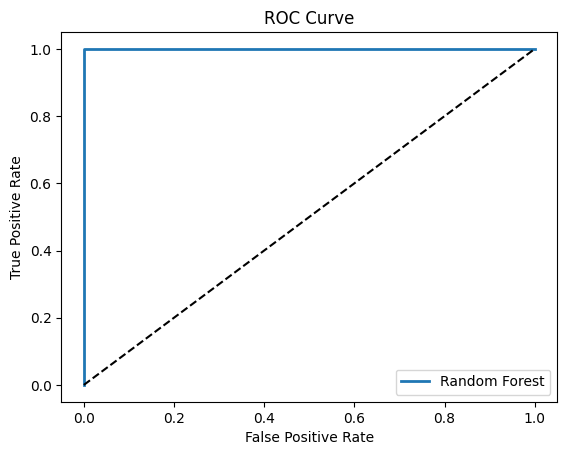

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_probas_rf = cross_val_predict(cla_rf, X_train, y_train, cv=5, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)

def plot_roc_curve(fpr_rf, tpr_rf, label=None):
    plt.plot(fpr_rf, tpr_rf, linewidth=2, label='Random Forest')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#Veo grafico
plot_roc_curve(fpr_rf, tpr_rf)


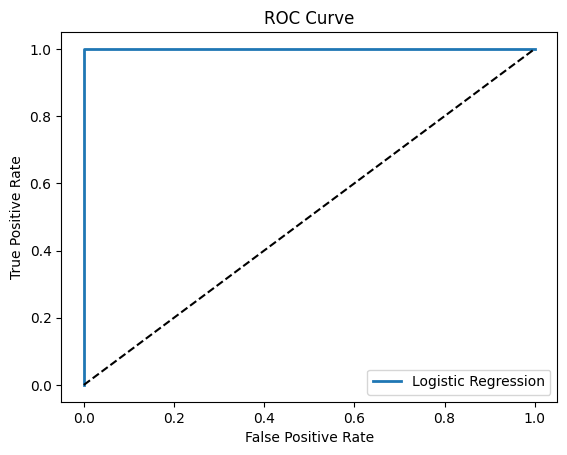

In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_scores_log = cross_val_predict(cla_log, X_train, y_train, cv=5, method = "decision_function")

fpr_log, tpr_log, thresholds_log = roc_curve(y_train, y_scores_log)

def plot_roc_curve(fpr_log, tpr_log, label=None):
    plt.plot(fpr_log, tpr_log, linewidth=2, label='Logistic Regression')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#Veo grafico
plot_roc_curve(fpr_log, tpr_log)



In [61]:
# Vemos los resultados con la metrica auc

from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_train, y_scores_rf)
print("AUC para Random Forest:", auc_rf)

auc_log = roc_auc_score(y_train, y_scores_log)
print("AUC para Regresión Logística:", auc_log)

AUC para Random Forest: 1.0
AUC para Regresión Logística: 1.0


<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [29]:
#El accuracy es bastante bajo asique voy a definir hiperparametros y ver si mejora
#usare gridsearch para encontrar los mejores hiperparametros
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(cla_rf,param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(X_train,y_train)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo
best_model=RandomForestClassifier(**best_params,random_state=42)

#Re entreno el modelo
best_model.fit(X_train,y_train)
accuracy=cross_val_score(best_model,X_train,y_train,cv=3,scoring='accuracy')
print("RF con hiperparametros: ",accuracy)

RF con hiperparametros:  [1. 1. 1.]


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?